
# Can we group students based on the number of upper division (updv.num) courses they’ve taken and their comfortability in math, stats, and programming? 


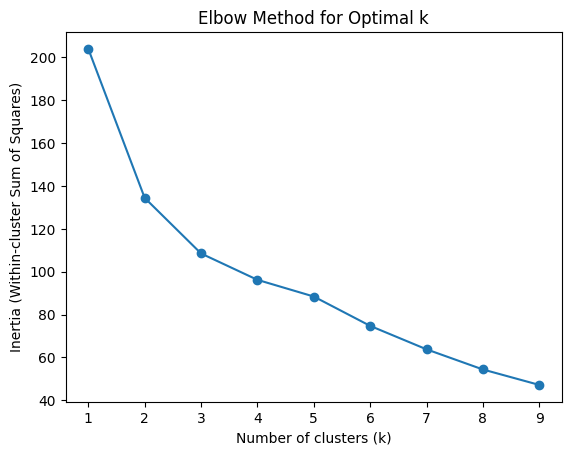

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Load data
background_clean = pd.read_csv("/Users/nathankim/PSTAT 197/module-0-class-survey-data-table13/data/background-clean.csv")

# Scale the features
background_clean["updv.num"] = (
    background_clean["updv.num"].astype(str).str.extract(r"(\d+)")[0].astype(float)
)
features = ["updv.num", "math.comf", "stat.comf", "prog.comf"]
background_clean = background_clean[features]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(background_clean)

inertia = []
k_values = range(1, 10)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (Within-cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.show()

In [12]:
optimal_k = 3  # suggested by elbow
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
background_clean["cluster"] = kmeans.fit_predict(scaled_data)
background_clean.groupby("cluster")[["updv.num", "math.comf", "stat.comf", "prog.comf"]].mean().round(2)

updv.num  math.comf  stat.comf  prog.comf
cluster                                           
0            4.15       3.38       3.08       3.38
1            8.12       4.94       4.71       4.12
2            7.57       3.71       4.10       3.95

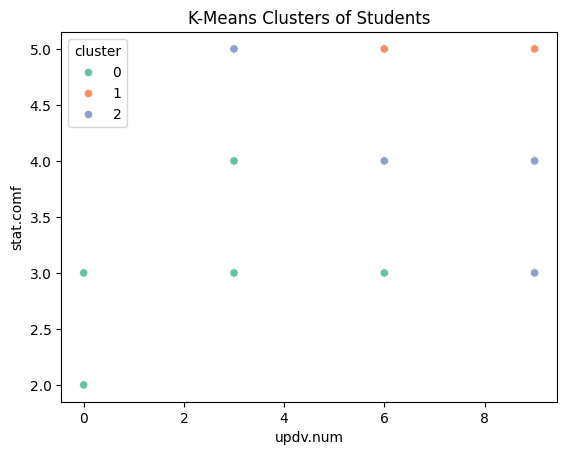

In [13]:
sns.scatterplot(data=background_clean, x="updv.num", y="stat.comf", hue="cluster", palette="Set2")
plt.title("K-Means Clusters of Students")
plt.show()

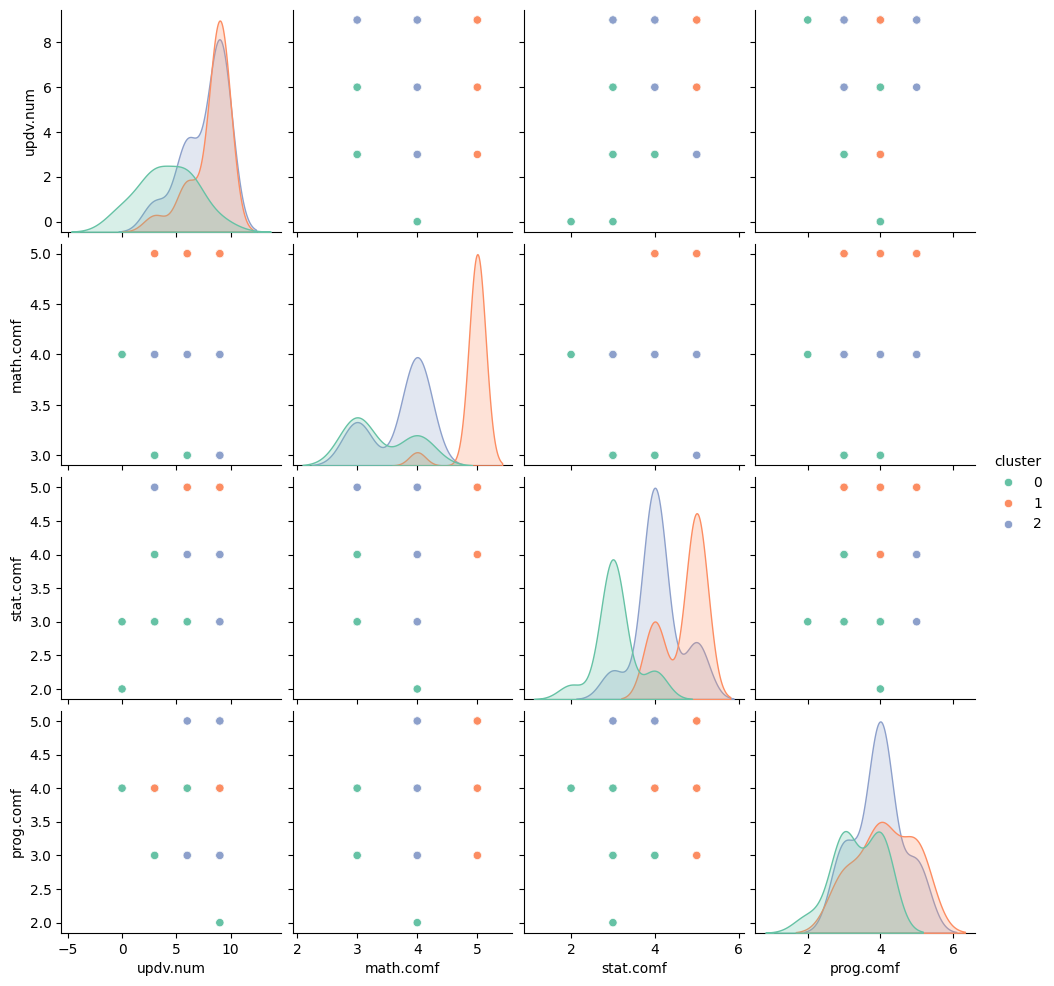

In [15]:
sns.pairplot(background_clean, vars=["updv.num", "math.comf", "stat.comf", "prog.comf"], hue="cluster", palette="Set2")

# Overall Conclusions

Using K-Means clustering (k=3), students were grouped based on their number of upper division courses and comfort levels in math, statistics, and programming.
The clusters display a clear gradient of experience and confidence.

Cluster 0 represents students earlier in the program, with an average of roughly four upper division courses and lower comfort ratings across all skill areas.
Cluster 2 includes students with more coursework and moderate confidence, especially in statistics and programming.
Cluster 1 stands out as the most advanced group, averaging over eight upper division courses and reporting the highest comfort levels in all three technical domains.

This pattern suggests a strong positive relationship between academic progression and self-perceived technical confidence: as students complete more upper division coursework, they tend to feel increasingly comfortable with data science related skills.